In [2]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [10]:
import numpy as np
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2


def calculate_angle(a, b, c):
    a = np.array([a.x, a.y, a.z])
    b = np.array([b.x, b.y, b.z])
    c = np.array([c.x, c.y, c.z])
    
    ba = a - b
    bc = c - b
    
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    
    return np.degrees(angle)

def draw_landmarks_on_image(rgb_image, detection_result):
    pose_landmarks_list = detection_result.pose_landmarks
    pose_world_landmarks_list = detection_result.pose_world_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]
        pose_world_landmarks = pose_world_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])

        # # Print the x, y, z coordinates of the WorldLandmarks
        # print(f"Pose {idx + 1} WorldLandmarks:")
        # for i, landmark in enumerate(pose_world_landmarks):
        #     print(f"WorldLandmark {i}: x={landmark.x:.4f}m, y={landmark.y:.4f}m, z={landmark.z:.4f}m")
        
        # Calculate and print the angles
        angle_12_24_26 = calculate_angle(pose_world_landmarks[12], pose_world_landmarks[24], pose_world_landmarks[26])
        angle_24_26_28 = calculate_angle(pose_world_landmarks[24], pose_world_landmarks[26], pose_world_landmarks[28])

        angle_11_23_25 = calculate_angle(pose_world_landmarks[11], pose_world_landmarks[23], pose_world_landmarks[25])
        angle_23_25_27 = calculate_angle(pose_world_landmarks[23], pose_world_landmarks[25], pose_world_landmarks[27])


        print(f"\nAngles:")
        print(f"Angle 12-24-26 (Right Hip): {angle_12_24_26:.2f} degrees")
        print(f"Angle 24-26-28 (Right Knee): {angle_24_26_28:.2f} degrees")
        print()  # Add a blank line between poses
        print(f"Angle 11-23-25 (Left Hip): {angle_11_23_25:.2f} degrees")
        print(f"Angle 23-25-27 (Left Knee): {angle_23_25_27:.2f} degrees")
        print()  # Add a blank line between poses

        solutions.drawing_utils.draw_landmarks(
            annotated_image,
            pose_landmarks_proto,
            solutions.pose.POSE_CONNECTIONS,
            solutions.drawing_styles.get_default_pose_landmarks_style())

    return annotated_image

I0000 00:00:1728835833.329211 40923899 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1 Max
W0000 00:00:1728835833.473437 41022046 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1728835833.526582 41022046 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/alan/.virtualenvs/face-ai/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



Angles:
Angle 12-24-26 (Right Hip): 156.70 degrees
Angle 24-26-28 (Right Knee): 175.55 degrees

Angle 11-23-25 (Left Hip): 168.00 degrees
Angle 23-25-27 (Left Knee): 170.57 degrees



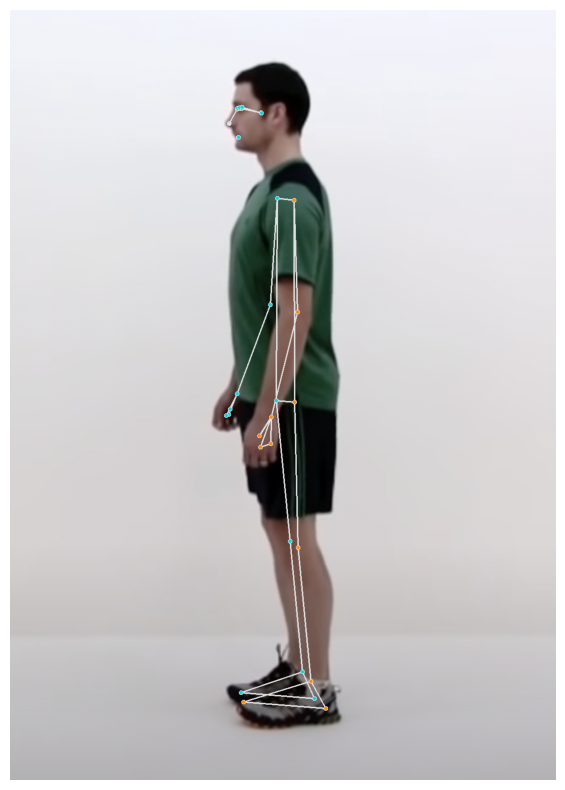


Angles:
Angle 12-24-26 (Right Hip): 84.95 degrees
Angle 24-26-28 (Right Knee): 83.90 degrees

Angle 11-23-25 (Left Hip): 145.72 degrees
Angle 23-25-27 (Left Knee): 76.79 degrees



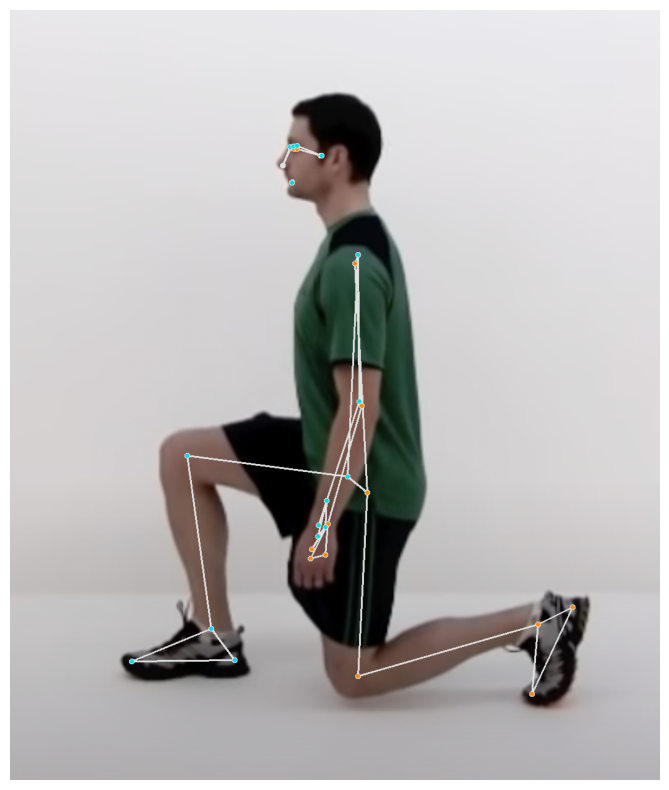


Angles:
Angle 12-24-26 (Right Hip): 158.02 degrees
Angle 24-26-28 (Right Knee): 85.78 degrees

Angle 11-23-25 (Left Hip): 96.91 degrees
Angle 23-25-27 (Left Knee): 76.84 degrees



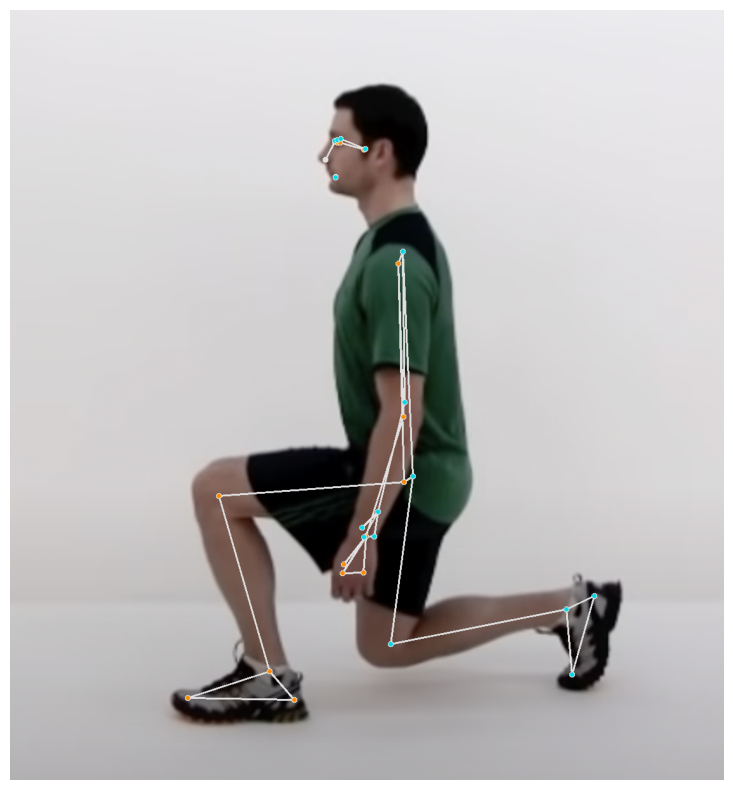


Angles:
Angle 12-24-26 (Right Hip): 158.07 degrees
Angle 24-26-28 (Right Knee): 170.97 degrees

Angle 11-23-25 (Left Hip): 161.23 degrees
Angle 23-25-27 (Left Knee): 164.72 degrees



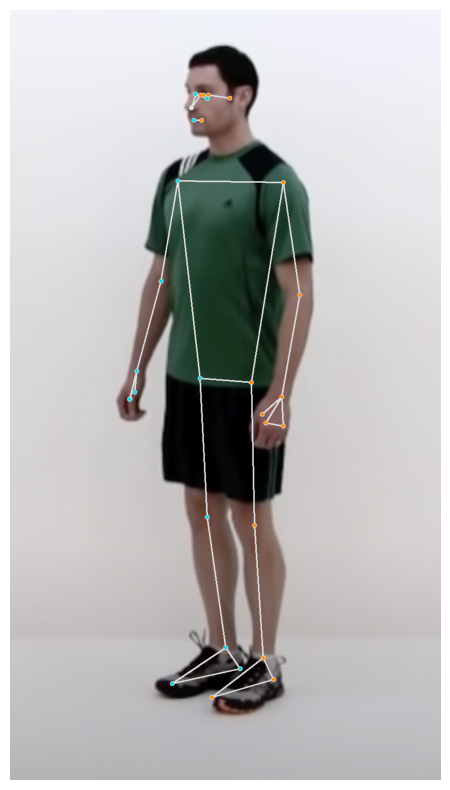


Angles:
Angle 12-24-26 (Right Hip): 91.69 degrees
Angle 24-26-28 (Right Knee): 72.23 degrees

Angle 11-23-25 (Left Hip): 149.08 degrees
Angle 23-25-27 (Left Knee): 69.86 degrees



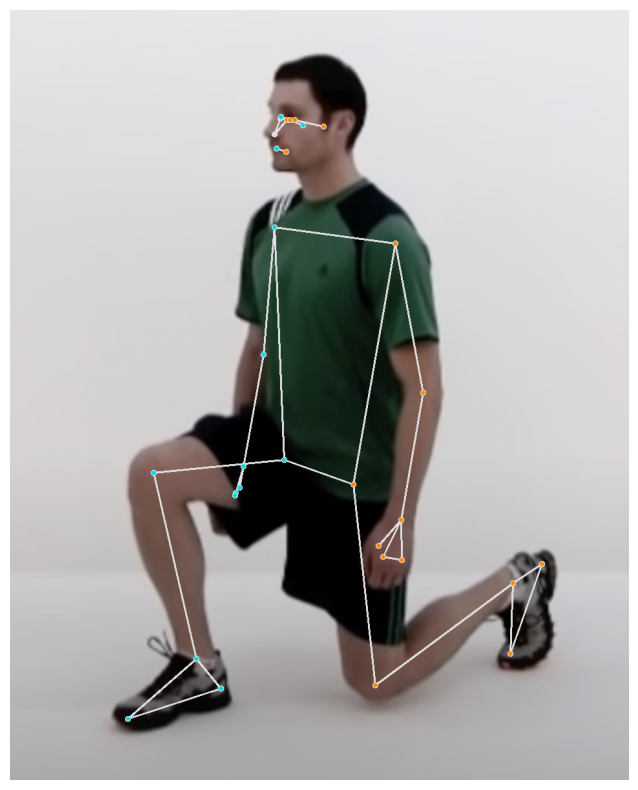


Angles:
Angle 12-24-26 (Right Hip): 163.39 degrees
Angle 24-26-28 (Right Knee): 85.22 degrees

Angle 11-23-25 (Left Hip): 89.70 degrees
Angle 23-25-27 (Left Knee): 83.96 degrees



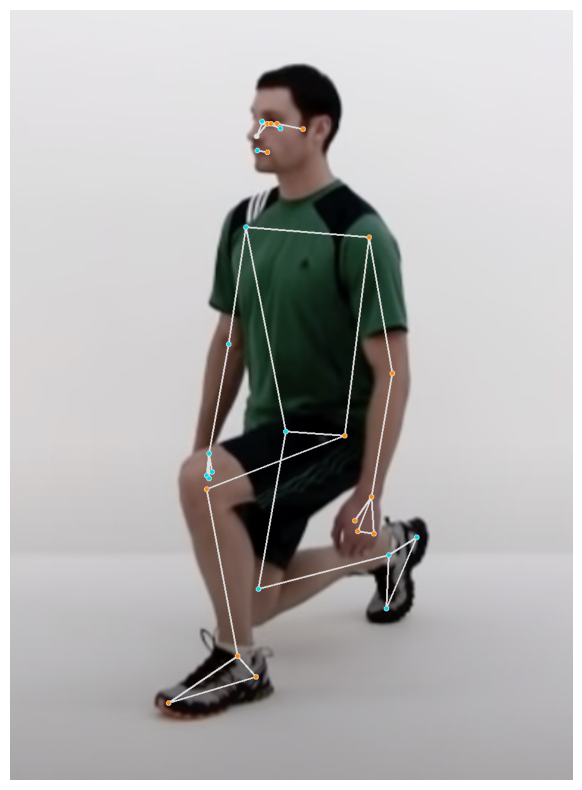


Angles:
Angle 12-24-26 (Right Hip): 177.55 degrees
Angle 24-26-28 (Right Knee): 162.11 degrees

Angle 11-23-25 (Left Hip): 157.99 degrees
Angle 23-25-27 (Left Knee): 150.55 degrees



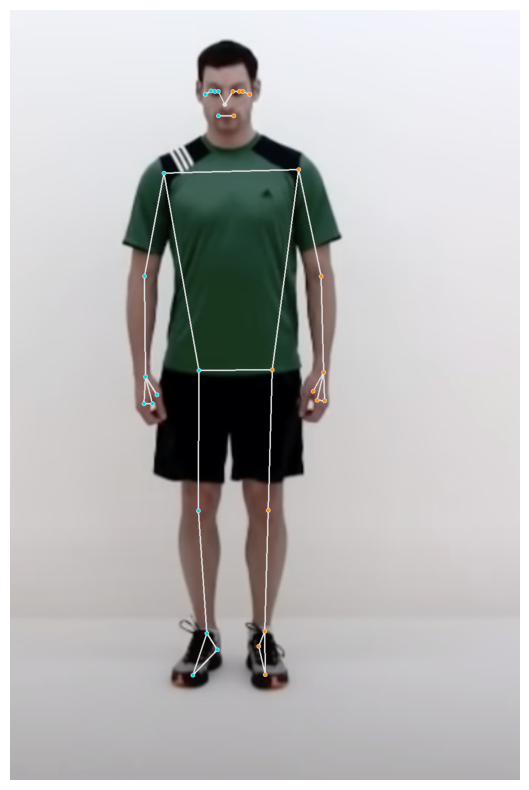


Angles:
Angle 12-24-26 (Right Hip): 87.89 degrees
Angle 24-26-28 (Right Knee): 80.48 degrees

Angle 11-23-25 (Left Hip): 143.54 degrees
Angle 23-25-27 (Left Knee): 69.77 degrees



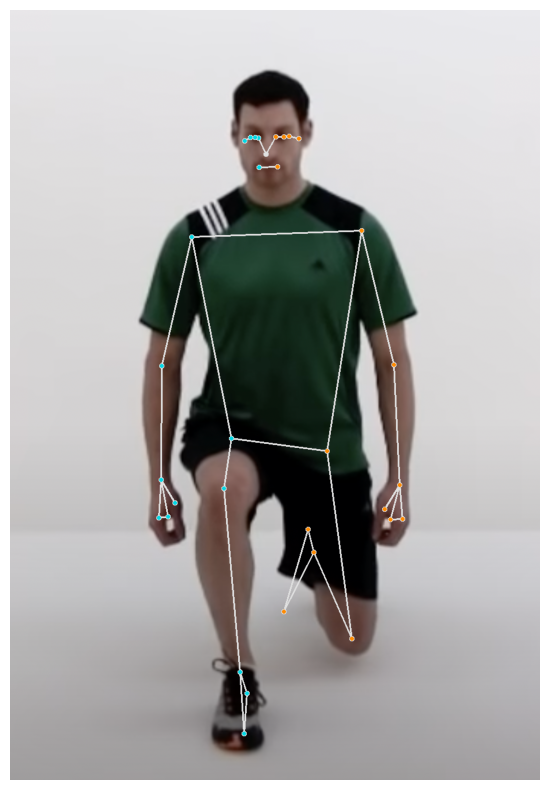


Angles:
Angle 12-24-26 (Right Hip): 166.42 degrees
Angle 24-26-28 (Right Knee): 75.80 degrees

Angle 11-23-25 (Left Hip): 82.38 degrees
Angle 23-25-27 (Left Knee): 77.77 degrees



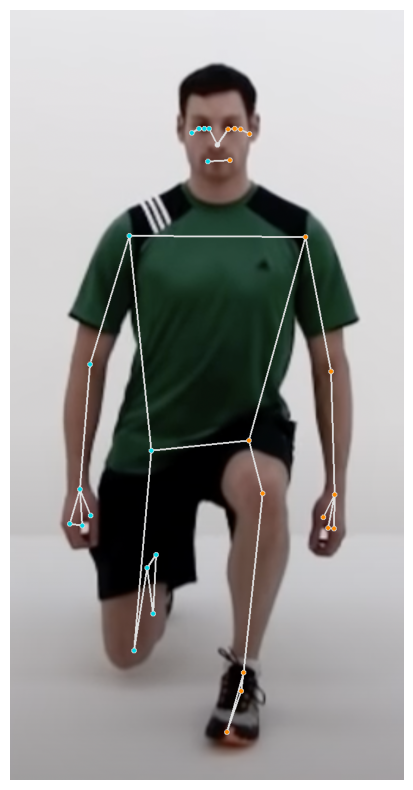

In [ ]:
# STEP 1: Import the necessary modules.
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create a PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

for imgfile in ["side_standing.png","side_right.png","side_left.png",
                "angle_standing.png","angle_right.png","angle_left.png",
                "frontal_standing.png","frontal_right.png","frontal_left.png"]:
    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(imgfile)

    # STEP 4: Detect pose landmarks from the input image.
    detection_result = detector.detect(image)

    # STEP 5: Process the detection result. In this case, visualize it.
    # Convert RGB image to BGR for draw_landmarks_on_image
    bgr_image = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGB2BGR)
    annotated_image = draw_landmarks_on_image(bgr_image, detection_result)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()